In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X, y = make_moons(n_samples=100, noise=0.1)
df=pd.DataFrame(X)
df['Y'] = y
df=df.rename(columns={0: "X1", 1:"X2"})
df.head()

,X1,X2,Y
0,1.509604,-0.378782,1
1,0.992906,-0.452359,1
2,-0.817113,0.389783,0
3,-0.839325,0.514713,0
4,-0.651823,0.628456,0


Text(0, 0.5, 'X2')

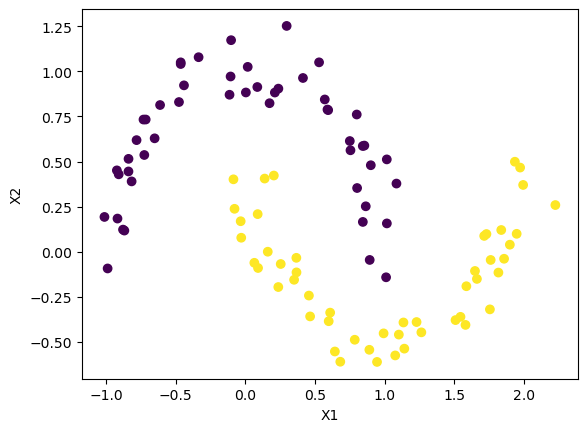

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, label=y)
plt.xlabel("X1")
plt.ylabel("X2")

In [4]:
# на входе - данные (ndarray), радиус окружности для поиска соседей и минимальное количество соседей для core point
def dbscan(data, r, min_points):
    #создаем объект ndarray - номер кластера для каждой точки (аналогично y в make_moons)
    labels = np.zeros(len(data), dtype=int)
    #очередь обработки точек
    queue = []
    #счетчик кластеров
    cluster_id = 0
    #для каждой точки без подписи кластера
    for i in range(len(data)):
        if labels[i] != 0:
            continue
        #находим соседей (функция ниже)
        neighbors = get_neighbors(data, i, r)
        #если число соседей меньше минимума, присваиваем подпись -1 (outliner)
        if len(neighbors) < min_points:
            labels[i] = -1
            continue
        cluster_id += 1
        queue.append(i)
        labels[i] = cluster_id
        while queue:
            #первая точка из очереди
            point = queue.pop(0)
            neighbors = get_neighbors(data, point, r)
            for neighbor in neighbors:
                #если соседа ещё не отнесли к кластеру, добавить в очередь
                if labels[neighbor] == 0:
                    queue.append(neighbor)
                    labels[neighbor] = cluster_id
                elif labels[neighbor] == -1:
                    continue
                else:
                    labels[labels == labels[neighbor]] = cluster_id

    return labels


#функция для поиска соседей точки при заданном радиусе и индексе точки
def get_neighbors(data, point, r):
    neighbors = []
    #находим точку по индексу
    for i in range(len(data)):
        if i == point:
            continue
        #находим расстояние между точками
        distance = np.linalg.norm(data[point] - data[i])
        #если сосед попадает в окружность, то включаем его в список соседей
        if distance <= r:
            neighbors.append(i)
    return neighbors

In [12]:
z = dbscan(X, 0.27, 5)
z

array([ 1,  1,  2,  2,  2,  1,  2,  1,  2,  1,  2,  1,  2,  2,  2,  1,  1,
        2,  2,  1,  1,  1,  2,  1,  1,  2,  1,  1,  2,  2,  2,  1,  2,  1,
        2,  1, -1,  2,  1,  2,  1,  1, -1,  2,  2,  1,  2,  2,  1,  1,  1,
        2,  1,  2,  2,  1,  1,  1,  2,  1,  2,  1,  1, -1,  2,  1,  1,  2,
        2,  2,  1,  1,  2,  2,  2,  1,  1,  2,  2,  2,  1,  2,  2,  1,  1,
        2,  2,  1,  1,  2,  1, -1,  2,  2,  1, -1,  2,  2,  2,  1])

Text(0, 0.5, 'X2')

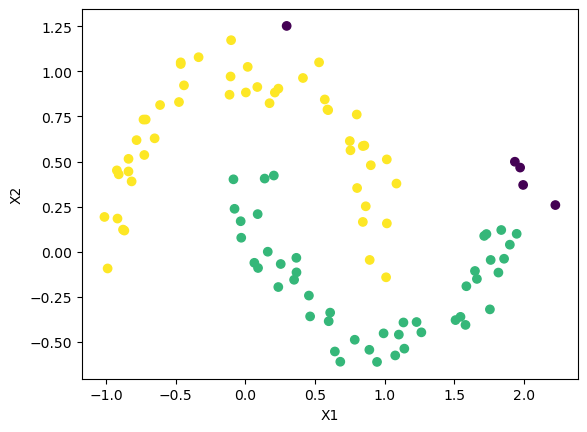

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=z, label=z)
plt.xlabel("X1")
plt.ylabel("X2")